In [24]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [25]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge([r,g,b]) # merge in rgb order to display with matplotlib

In [26]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

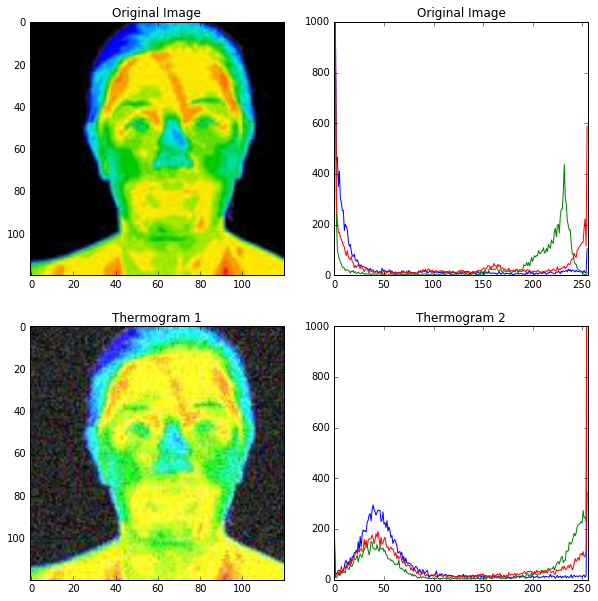

In [27]:
img_original = cv2.imread('../colorImages/face_thermogram.jpg')
img = cv2.imread('../colorImages/face_thermogram_4.jpg')

plt.figure(figsize=(10,10)) 

plt.subplot(221)
plt.imshow(invertChannels(img_original))
plt.title('Original Image')

plt.subplot(222)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_original],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 
    plt.ylim([0,1000])
plt.title('Original Image')

plt.subplot(223)
plt.imshow(invertChannels(img))
plt.title('Thermogram 1')

plt.subplot(224)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    
    plt.ylim([0,1000])
plt.title('Thermogram 2')    

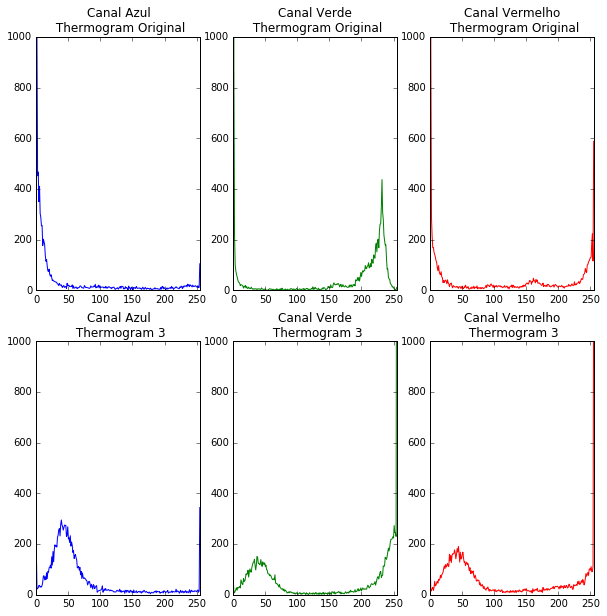

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(231)
histr = cv2.calcHist([img_original],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 
plt.ylim([0,1000])
plt.title('Canal Azul\n Thermogram Original')   

plt.subplot(232)
histr = cv2.calcHist([img_original],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Verde\n Thermogram Original')  

plt.subplot(233)
histr = cv2.calcHist([img_original],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Vermelho\n Thermogram Original')  

plt.subplot(234)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 
plt.ylim([0,1000])
plt.title('Canal Azul\n Thermogram 3')   

plt.subplot(235)
histr = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Verde\n Thermogram 3')  

plt.subplot(236)
histr = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Vermelho\n Thermogram 3')  

# Problema: Presença de ruido gaussiano

In [31]:
# Filtered with gaussian filter
#b,g,r = cv2.split(img)
print "Starting Error %s"  % mse(img_original,img)
for i in np.arange(0,50,2):
    for ksize in [3,5,7,9]:
        img_enhanced = cv2.GaussianBlur(img,(ksize,ksize),i)
        print "Sigma: %s, Ksize: %s, MSE: %s" %(i, ksize, mse(img,img_enhanced))

Starting Error 4546.74756944
Sigma: 0, Ksize: 3, MSE: 459.617986111
Sigma: 0, Ksize: 5, MSE: 666.319722222
Sigma: 0, Ksize: 7, MSE: 919.451388889
Sigma: 0, Ksize: 9, MSE: 1101.87361111
Sigma: 2, Ksize: 3, MSE: 643.727013889
Sigma: 2, Ksize: 5, MSE: 943.880486111
Sigma: 2, Ksize: 7, MSE: 1162.41868056
Sigma: 2, Ksize: 9, MSE: 1283.24805556
Sigma: 4, Ksize: 3, MSE: 681.493680556
Sigma: 4, Ksize: 5, MSE: 1051.98881944
Sigma: 4, Ksize: 7, MSE: 1470.91104167
Sigma: 4, Ksize: 9, MSE: 1879.02722222
Sigma: 6, Ksize: 3, MSE: 680.081736111
Sigma: 6, Ksize: 5, MSE: 1064.79451389
Sigma: 6, Ksize: 7, MSE: 1509.72256944
Sigma: 6, Ksize: 9, MSE: 1977.33319444
Sigma: 8, Ksize: 3, MSE: 680.081736111
Sigma: 8, Ksize: 5, MSE: 1075.66381944
Sigma: 8, Ksize: 7, MSE: 1543.26013889
Sigma: 8, Ksize: 9, MSE: 2004.995625
Sigma: 10, Ksize: 3, MSE: 680.081736111
Sigma: 10, Ksize: 5, MSE: 1082.976875
Sigma: 10, Ksize: 7, MSE: 1553.40145833
Sigma: 10, Ksize: 9, MSE: 2061.01229167
Sigma: 12, Ksize: 3, MSE: 680.08173

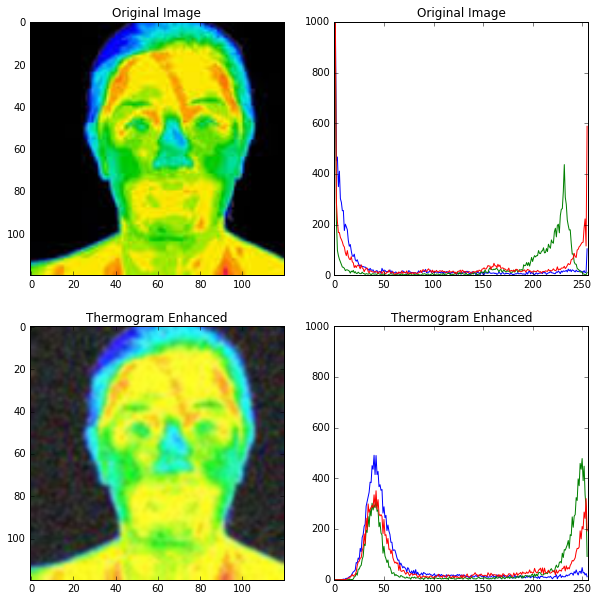

In [32]:
plt.figure(figsize=(10,10)) 

img_enhanced = cv2.GaussianBlur(img,(3,3),0)

plt.subplot(221)
plt.imshow(invertChannels(img_original))
plt.title('Original Image')

plt.subplot(222)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_original],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 
    plt.ylim([0,1000])
plt.title('Original Image')

plt.subplot(223)
plt.imshow(invertChannels(img_enhanced))
plt.title('Thermogram Enhanced')

plt.subplot(224)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_enhanced],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    
    plt.ylim([0,1000])
plt.title('Thermogram Enhanced')